# Importando dependências

In [1]:
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set_style("whitegrid")

In [76]:
from sklearn import preprocessing
from scipy import stats
le = preprocessing.LabelEncoder()
from dython import nominal
from dython.nominal import associations
from dython.nominal import identify_nominal_columns

# Acessando dados csv

In [3]:
dados = pd.read_csv('Tratamento_alura_voz.csv')
dados.head()

,ID Cliente,Churn,gênero,idoso,Parceiro,Dependentes,Meses contrato,Serviço telefone,Linhas multiplas,Serviço Internet,...,Dispositivo_Proteção,Suporte Técnico,Tv Streaming,Filmes Streaming,Contrato,Conta Papel,Método pagamento,Cobrança Mensal,Cobrança Total,Cobrança diária
0,0002-ORFBO,Não,Mulher,Não,Sim,Sim,9,Sim,Não,DSL,...,Não,Sim,Sim,Não,Um ano,Sim,Correspondência,65.60,593.30,2.19
1,0003-MKNFE,Não,Homem,Não,Não,Não,9,Sim,Sim,DSL,...,Não,Não,Não,Sim,Mês a mês,Não,Correspondência,59.90,542.40,2.00
2,0004-TLHLJ,Sim,Homem,Não,Não,Não,4,Sim,Não,Fibra óptica,...,Sim,Não,Não,Não,Mês a mês,Sim,Eletrônico,73.90,280.85,2.46
3,0011-IGKFF,Sim,Homem,Sim,Sim,Não,13,Sim,Não,Fibra óptica,...,Sim,Não,Sim,Sim,Mês a mês,Sim,Eletrônico,98.00,1237.85,3.27
4,0013-EXCHZ,Sim,Mulher,Sim,Sim,Não,3,Sim,Não,Fibra óptica,...,Não,Sim,Sim,Não,Mês a mês,Sim,Correspondência,83.90,267.40,2.80


In [4]:
# retirando a coluna `ID Cliente`
dados = dados.iloc[:,1:]

# Visualizando colunas

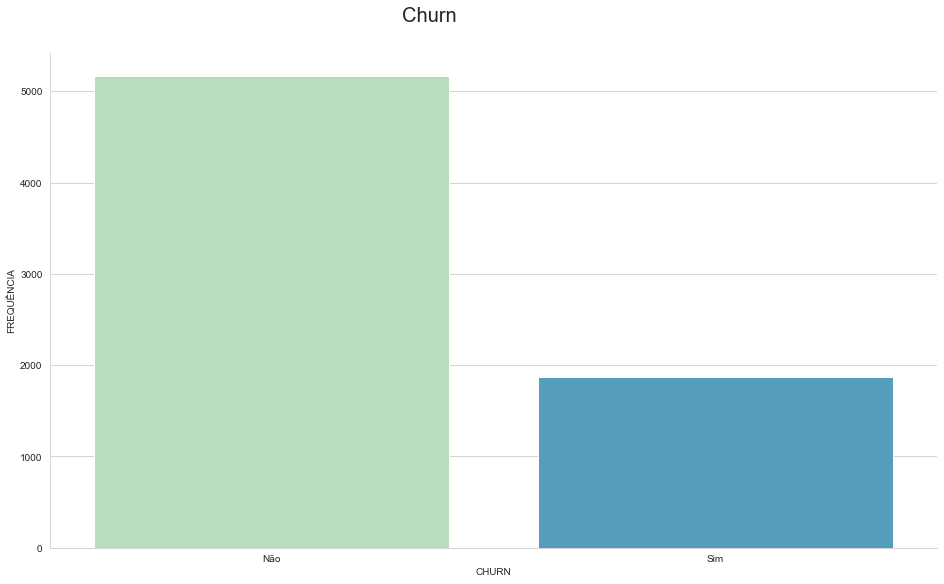

In [5]:
# Plotando distribuição do Churn
ax = sns.catplot(x="Churn", kind="count", palette="GnBu", data=dados);
ax.fig.suptitle('Churn', fontsize=20, y=1.05)
ax.set(xlabel='CHURN', ylabel='FREQUÊNCIA')
plt.gcf().set_size_inches(15, 8)

In [6]:
# Analisando dados da variável Churn
print()
print("'Não' representa {:.2f}% da distribuição dos dados na variável Churn.".format(dados.groupby('Churn')['gênero'].count()[0]/dados.Churn.count()*100))
print("'Sim' representa {:.2f}% da distribuição dos dados na variável Churn.".format(dados.groupby('Churn')['gênero'].count()[1]/dados.Churn.count()*100))


'Não' representa 73.42% da distribuição dos dados na variável Churn.
'Sim' representa 26.58% da distribuição dos dados na variável Churn.


---

* O gráfico acima representa a divisão dos dados para a variável `CHURN`, sendo **73.42%** destes com o valor **NÃO**, e **26.58%**, **SIM.**

---

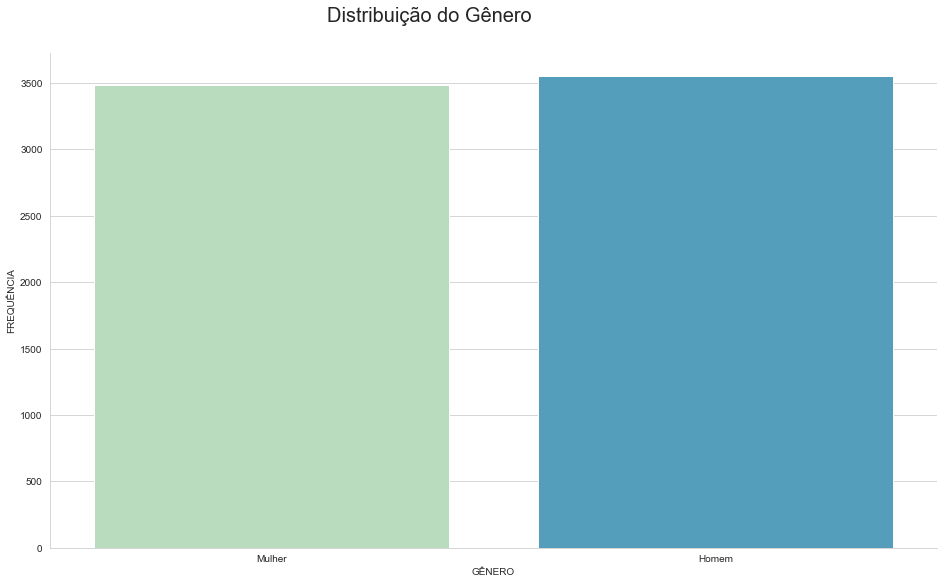

In [7]:
# Plotando Variável Gênero
ax = sns.catplot(x="gênero",  kind="count", palette="GnBu", data=dados);
ax.fig.suptitle('Distribuição do Gênero', fontsize=20, y=1.05);
ax.set(xlabel='GÊNERO', ylabel='FREQUÊNCIA') 
plt.gcf().set_size_inches(15, 8)

---

* A classificação acima representa que os dados estão em **equilíbrio** na variável **`GÊNERO`.**

---

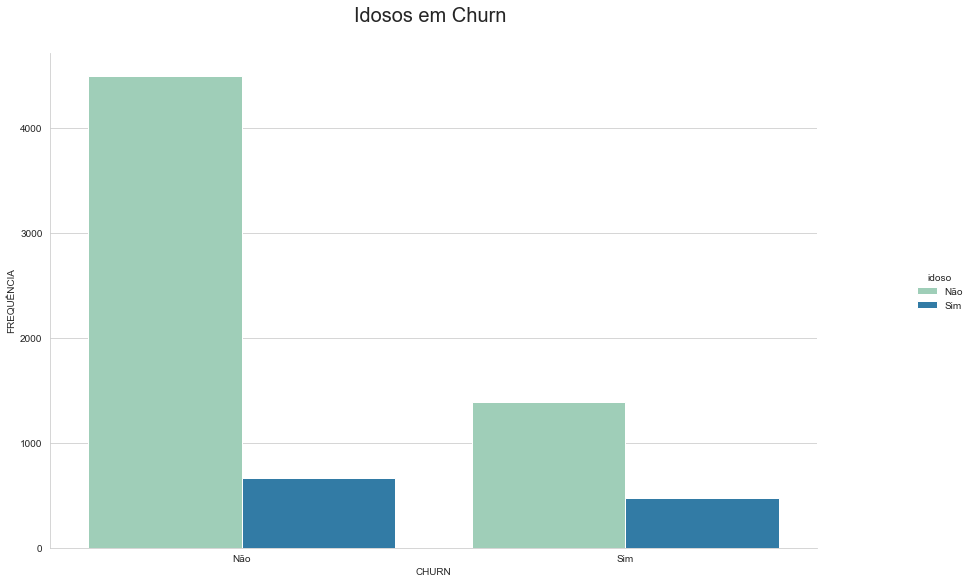

In [8]:
# Plotando variável Idoso em Churn 
ax = sns.catplot(x="Churn",  kind="count", hue='idoso', palette="YlGnBu", data=dados);
ax.fig.suptitle('Idosos em Churn', fontsize=20, y=1.05);
ax.set(xlabel='CHURN', ylabel='FREQUÊNCIA')
plt.gcf().set_size_inches(15, 8)

In [9]:
# Analisando dados da Variável Idosos em Churn
print()
print('Dos Clientes que permancem, são idosos: ')
print("'Não' representa {:.2f}%.".format(dados.query("Churn == 'Não'")['idoso'].value_counts()[0]/dados.query("Churn == 'Não'")['idoso'].count()*100))
print("'Sim' representa {:.2f}% .".format(dados.query("Churn == 'Não'")['idoso'].value_counts()[1]/dados.query("Churn == 'Não'")['idoso'].count()*100))
print()
print('Dos Clientes que cancelaram,  faz uso de Conta Papel: ')
print("'Não' representa {:.2f}%.".format(dados.query("Churn == 'Sim'")['idoso'].value_counts()[0]/dados.query("Churn == 'Sim'")['idoso'].count()*100))
print("'Sim' representa {:.2f}%.".format(dados.query("Churn == 'Sim'")['idoso'].value_counts()[1]/dados.query("Churn == 'Sim'")['idoso'].count()*100))
print()


Dos Clientes que permancem, são idosos: 
'Não' representa 87.10%.
'Sim' representa 12.90% .

Dos Clientes que cancelaram,  faz uso de Conta Papel: 
'Não' representa 74.53%.
'Sim' representa 25.47%.



---

* Dos dois gráficos ilustrados acima, podemos chegar à conclusão que **74.53%** (1393) da perda de clientes/receita (`CHURN`) **são de indivíduos com a faixa etária ABAIXO DE 60 ANOS.**

---

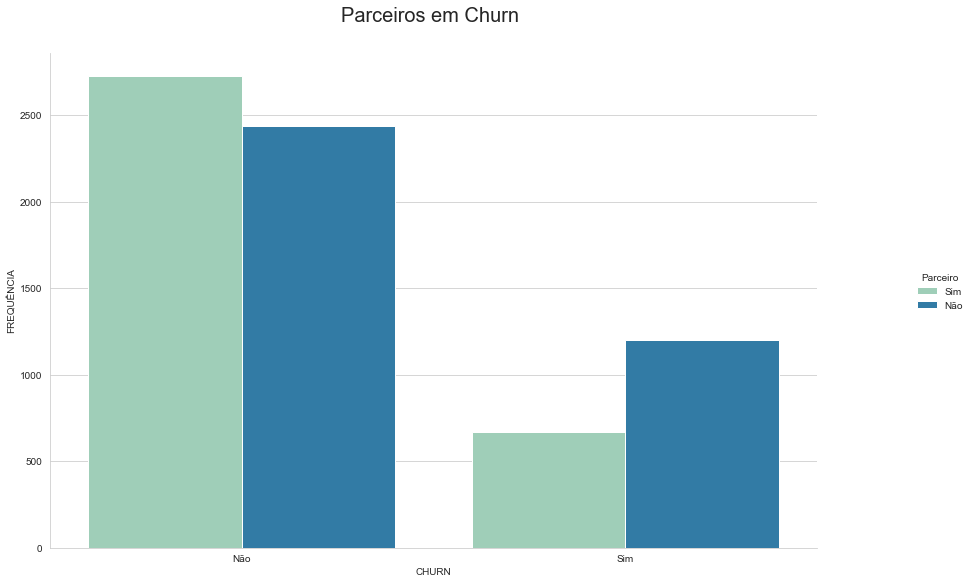

In [10]:
# Plotando variável Parceiro em Churn
ax = sns.catplot(x='Churn',  kind="count", hue='Parceiro',  palette="YlGnBu", order=['Não', 'Sim'], data=dados);
ax.fig.suptitle('Parceiros em Churn', fontsize=20, y=1.05);
ax.set(xlabel='CHURN', ylabel='FREQUÊNCIA')
plt.gcf().set_size_inches(15, 8)

In [11]:
# Representação Coluna Parceiro em Churn
print()
print('Dos Clientes que permancem, possuem parceiros: ')
print("'Não' representa {:.2f}%.".format(dados.query("Churn == 'Não'")['Parceiro'].value_counts()[0]/dados.query("Churn == 'Não'")['Parceiro'].count()*100))
print("'Sim' representa {:.2f}% .".format(dados.query("Churn == 'Não'")['Parceiro'].value_counts()[1]/dados.query("Churn == 'Não'")['Parceiro'].count()*100))
print()
print('Dos Clientes que cancelaram, possuem parceiros: ')
print("'Não' representa {:.2f}%.".format(dados.query("Churn == 'Sim'")['Parceiro'].value_counts()[0]/dados.query("Churn == 'Sim'")['Parceiro'].count()*100))
print("'Sim' representa {:.2f}%.".format(dados.query("Churn == 'Sim'")['Parceiro'].value_counts()[1]/dados.query("Churn == 'Sim'")['Parceiro'].count()*100))
print()


Dos Clientes que permancem, possuem parceiros: 
'Não' representa 52.76%.
'Sim' representa 47.24% .

Dos Clientes que cancelaram, possuem parceiros: 
'Não' representa 64.21%.
'Sim' representa 35.79%.



---

* Os que **não possuem parceiros** representam **52.76%** dos fidelizados. No entanto, dentre os **valores positivos** na Variável Churn, os sem parceiros são **64.21%** da divisão.

---

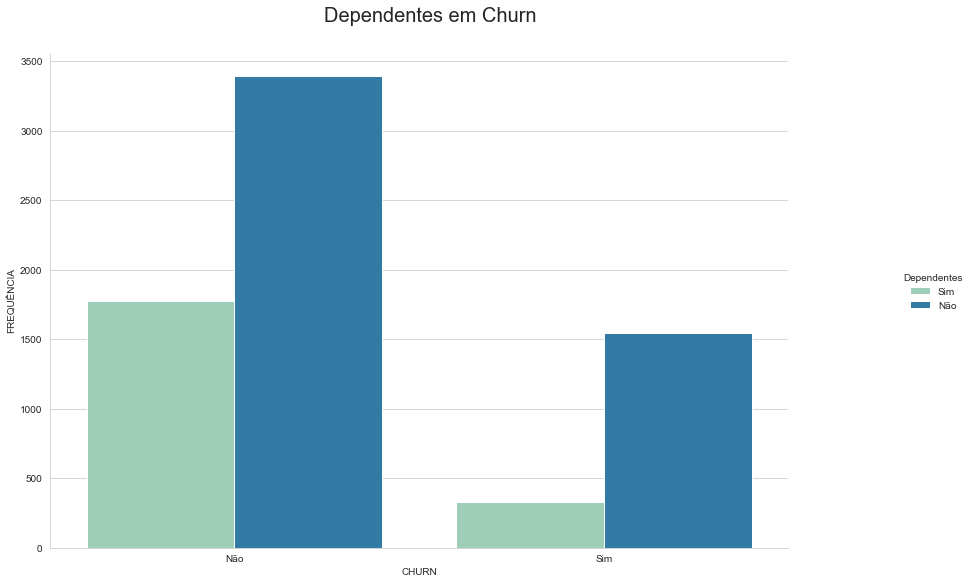

In [12]:
# Plotando Dependentes em Churn
ax = sns.catplot(x='Churn', hue="Dependentes", kind="count",palette="YlGnBu", data=dados);
ax.fig.suptitle('Dependentes em Churn', fontsize=20, y=1.05);
ax.set(xlabel='CHURN', ylabel='FREQUÊNCIA')
plt.gcf().set_size_inches(15, 8)

In [13]:
# Representação Coluna @Parceiro especificamente perante os dados positivos de @Churn
print()
print('Dos Clientes que permancem, possuem dependentes: ')
print("'Sim' representa {:.2f}%.".format(dados.query("Churn == 'Não'")['Dependentes'].value_counts()[0]/dados.query("Churn == 'Não'")['Dependentes'].count()*100))
print("'Não' representa {:.2f}% .".format(dados.query("Churn == 'Não'")['Dependentes'].value_counts()[1]/dados.query("Churn == 'Não'")['Dependentes'].count()*100))
print()
print('Dos Clientes que cancelaram, possuem dependentes: ')
print("'Sim' representa {:.2f}%.".format(dados.query("Churn == 'Sim'")['Dependentes'].value_counts()[0]/dados.query("Churn == 'Sim'")['Dependentes'].count()*100))
print("'Não' representa {:.2f}%.".format(dados.query("Churn == 'Sim'")['Dependentes'].value_counts()[1]/dados.query("Churn == 'Sim'")['Dependentes'].count()*100))
print()


Dos Clientes que permancem, possuem dependentes: 
'Sim' representa 65.66%.
'Não' representa 34.34% .

Dos Clientes que cancelaram, possuem dependentes: 
'Sim' representa 82.56%.
'Não' representa 17.44%.



---


* Na seção dos dados de **evasão do cliente**, **82,56%** dos indivíduos **não possuíam dependentes**. Frente a **65.66%** dos fidelizados.


---

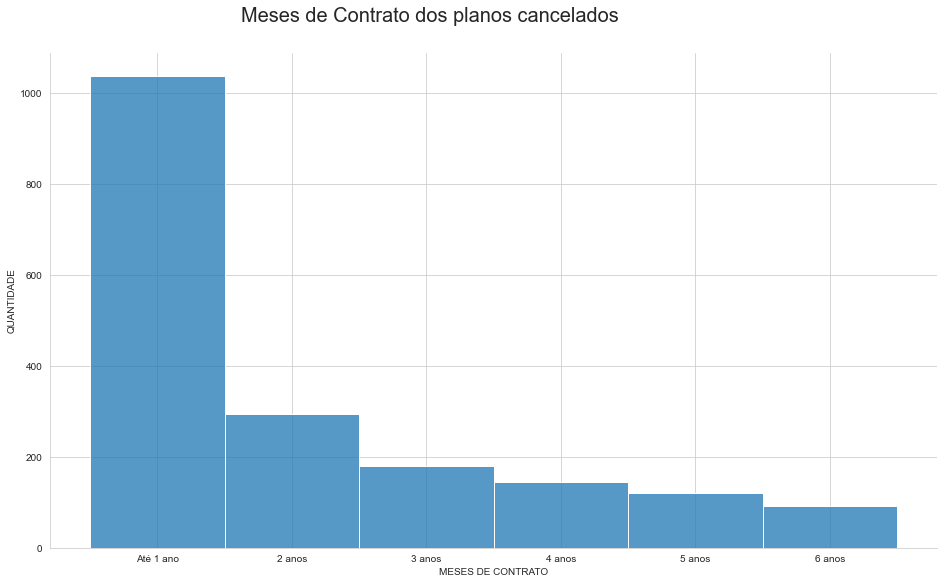

In [14]:
# Plotando em histrograma a distribuição do tempo dos contratos para os que evadiram
label0= ['Até 1 ano', '2 anos', '3 anos','4 anos','5 anos', '6 anos']
ax =sns.displot(pd.cut(dados.query("Churn == 'Sim'")['Meses contrato'], bins=np.arange(0, 80, 12), labels=label0));
ax.fig.suptitle('Meses de Contrato dos planos cancelados', fontsize=20, y=1.05);
ax.set(xlabel='MESES DE CONTRATO', ylabel='QUANTIDADE')
plt.gcf().set_size_inches(15, 8)

In [15]:
# Análise estatística dos evadidos
dados.query("Churn == 'Sim'")['Meses contrato'].describe()

count   1869.00
mean      17.98
std       19.53
min        1.00
25%        2.00
50%       10.00
75%       29.00
max       72.00
Name: Meses contrato, dtype: float64

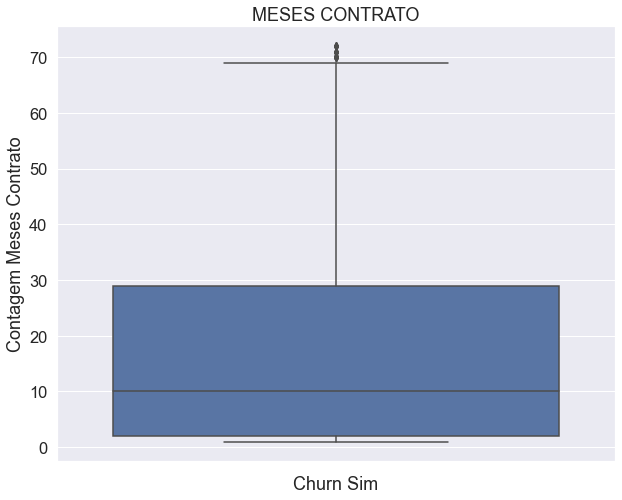

In [16]:
sns.set(font_scale = 1.5)
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data = dados.query("Churn == 'Sim'"), y="Meses contrato")
ax.set(title='MESES CONTRATO')
ax.set(xlabel='Churn Sim', ylabel='Contagem Meses Contrato');

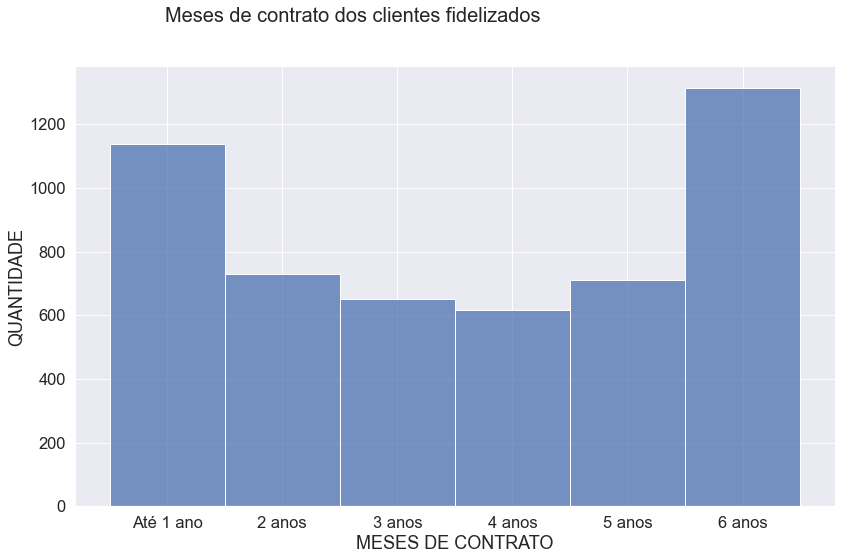

In [17]:
# Plotando em histrograma a distribuição do tempo dos contratos para os fidelizados
ax =sns.displot(pd.cut(dados.query("Churn == 'Não'")['Meses contrato'], bins=np.arange(0, 80, 12), labels=label0));
ax.fig.suptitle('Meses de contrato dos clientes fidelizados', fontsize=20, y=1.05);
ax.set(xlabel='MESES DE CONTRATO', ylabel='QUANTIDADE')
plt.gcf().set_size_inches(15, 8)

In [18]:
# Análise estatística dos fidelizados
dados.query("Churn == 'Não'")['Meses contrato'].describe()

count   5163.00
mean      37.65
std       24.08
min        1.00
25%       15.00
50%       38.00
75%       61.00
max       72.00
Name: Meses contrato, dtype: float64

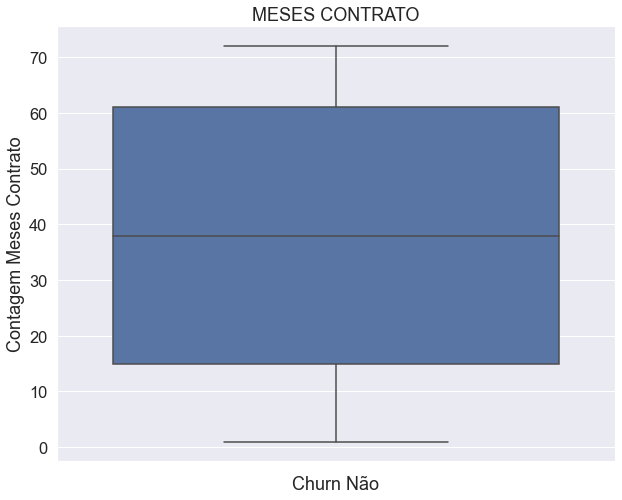

In [19]:
sns.set(font_scale = 1.5)
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data = dados.query("Churn == 'Não'"), y="Meses contrato")
ax.set(title='MESES CONTRATO')
ax.set(xlabel='Churn Não', ylabel='Contagem Meses Contrato');

---



* A base de dados demonstra que **50%** daqueles que optaram a **cancelarem** os contratos o fizeram em até **10 meses** de uso e metade dos da distribuição se encontra entre **R\\$2 a R\\$29**. Enquanto aqueles clientes que **permaneceram** na empresa, a soma de **50%** de contratos permanecem durante **38 meses**, e metade dos da distribuição destes se encontra entre **R\\$15 a R\\$61**.

Obs: Os dados apresentados referem-se à mediana de cada distribuição, visto que essa possui menos sujeição a variação com a presença de dados distoantes (outliers).

---

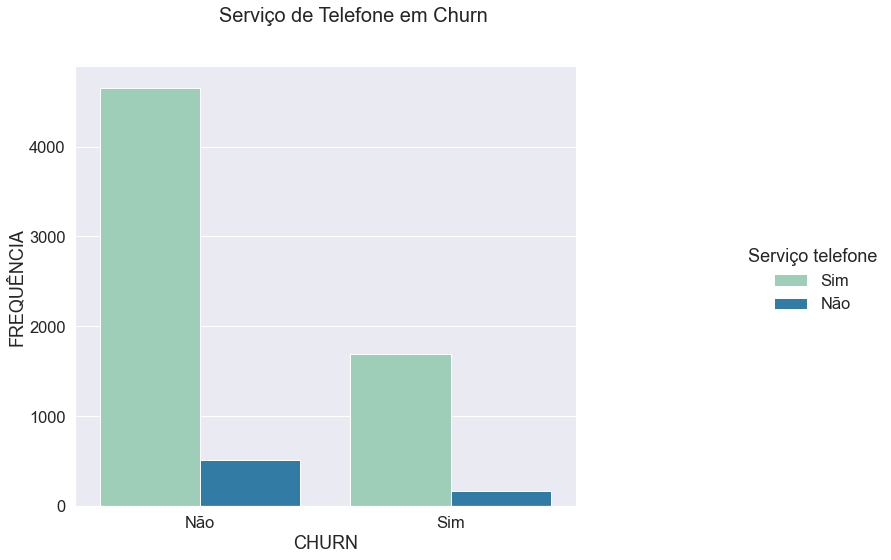

In [20]:
# Plotando uso de serviços telefônicos na variável Churn
ax = sns.catplot(x='Churn', hue="Serviço telefone", kind="count",palette="YlGnBu", data=dados);
ax.fig.suptitle('Serviço de Telefone em Churn', fontsize=20, y=1.05);
ax.set(xlabel='CHURN', ylabel='FREQUÊNCIA')
plt.gcf().set_size_inches(15, 8)

In [21]:
# Analisando os dados de serviço telefônico em Churn
print()
print('Dos Clientes que permancem, possuem serviço telefônico: ')
print("'Sim' representa {:.2f}%.".format(dados.query("Churn == 'Não'")['Serviço telefone'].value_counts()[0]/dados.query("Churn == 'Não'")['Serviço telefone'].count()*100))
print("'Não' representa {:.2f}% .".format(dados.query("Churn == 'Não'")['Serviço telefone'].value_counts()[1]/dados.query("Churn == 'Não'")['Serviço telefone'].count()*100))
print()
print('Dos Clientes que cancelaram, possuem serviço telefônico: ')
print("'Sim' representa {:.2f}%.".format(dados.query("Churn == 'Sim'")['Serviço telefone'].value_counts()[0]/dados.query("Churn == 'Sim'")['Serviço telefone'].count()*100))
print("'Não' representa {:.2f}%.".format(dados.query("Churn == 'Sim'")['Serviço telefone'].value_counts()[1]/dados.query("Churn == 'Sim'")['Serviço telefone'].count()*100))
print()


Dos Clientes que permancem, possuem serviço telefônico: 
'Sim' representa 90.12%.
'Não' representa 9.88% .

Dos Clientes que cancelaram, possuem serviço telefônico: 
'Sim' representa 90.90%.
'Não' representa 9.10%.



---
* Mais de **90%** dos clientes que cancelaram seus serviços fazem uso de **serviço de telefone**.


---

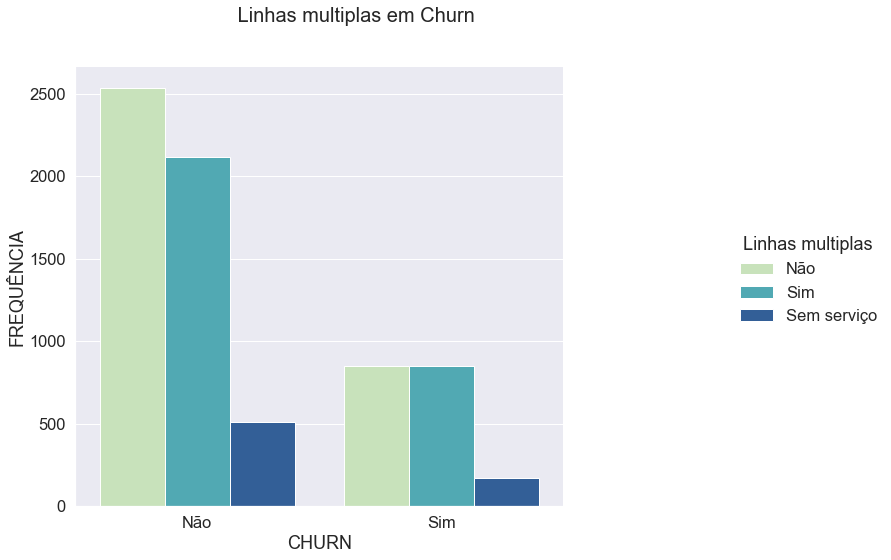

In [22]:
# Plotando dados de possuidores de linhas multiplas em relação ao Churn 
ax = sns.catplot(x="Churn", hue='Linhas multiplas', kind="count", palette="YlGnBu", data=dados);
ax.fig.suptitle(' Linhas multiplas em Churn', fontsize=20, y=1.05);
ax.set(xlabel='CHURN', ylabel='FREQUÊNCIA')
plt.gcf().set_size_inches(15, 8)

In [23]:
# Analisando dados linhas múltiplas
print()
print('Dos Clientes que permancem, possuem linhas múltiplas de telefone: ')
print("'Nâo' representa {:.2f}%.".format(dados.query("Churn == 'Não'")['Linhas multiplas'].value_counts()[0]/dados.query("Churn == 'Não'")['Linhas multiplas'].count()*100))
print("'Sim' representa {:.2f}% .".format(dados.query("Churn == 'Não'")['Linhas multiplas'].value_counts()[1]/dados.query("Churn == 'Não'")['Linhas multiplas'].count()*100))
print("'Sem serviço' representa {:.2f}%.".format(dados.query("Churn == 'Não'")['Linhas multiplas'].value_counts()[2]/dados.query("Churn == 'Não'")['Linhas multiplas'].count()*100))
print()
print('Dos Clientes que cancelaram,  possuem linhas múltiplas de telefone: ')
print("'Nâo' representa {:.2f}%.".format(dados.query("Churn == 'Sim'")['Linhas multiplas'].value_counts()[0]/dados.query("Churn == 'Sim'")['Linhas multiplas'].count()*100))
print("'Sim' representa {:.2f}%.".format(dados.query("Churn == 'Sim'")['Linhas multiplas'].value_counts()[1]/dados.query("Churn == 'Sim'")['Linhas multiplas'].count()*100))
print("'Sem serviço' representa {:.2f}%.".format(dados.query("Churn == 'Sim'")['Linhas multiplas'].value_counts()[2]/dados.query("Churn == 'Sim'")['Linhas multiplas'].count()*100))
print()


Dos Clientes que permancem, possuem linhas múltiplas de telefone: 
'Nâo' representa 49.12%.
'Sim' representa 41.00% .
'Sem serviço' representa 9.88%.

Dos Clientes que cancelaram,  possuem linhas múltiplas de telefone: 
'Nâo' representa 45.48%.
'Sim' representa 45.43%.
'Sem serviço' representa 9.10%.



---

* Apesar de muito semelhante a distribuição de dados na variável `linhas_multiplas`, o teste de semelhança de distribuição rejeitou a hipótese. Portanto os dados refentes aqueles que permanecem clientes: **Não possui linhas múltiplas são 49.12%** para os primeiros e **41%** possuíam. Para os que cancelaram suas linhas: **Não possui** são **45.48%** não possuiam, enquanto **45.43%** possuíam linhas multiplas. Os sem serviços representam 9% nos dois balanços.

---

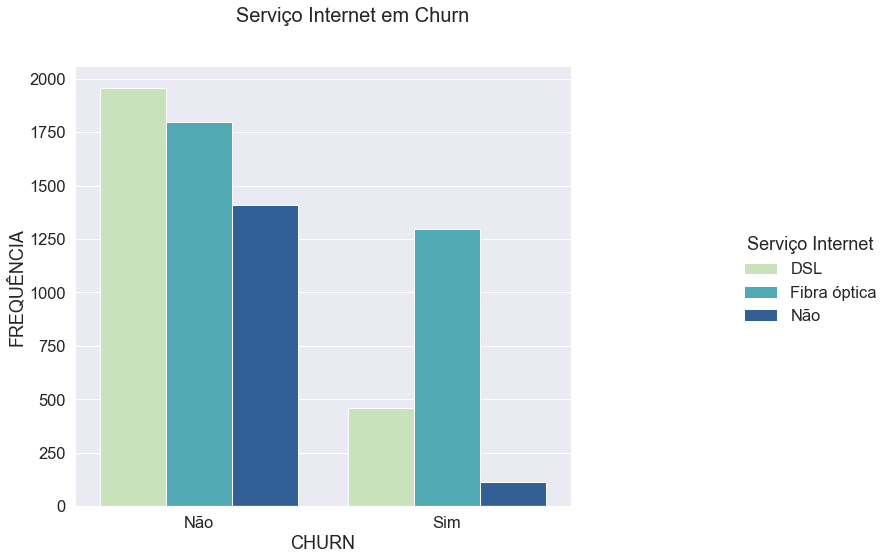

In [24]:
# Plotando variável Serviço Internet em relação ao Churn
ax = sns.catplot(x="Churn", hue='Serviço Internet', kind="count",  palette="YlGnBu", data=dados);
ax.fig.suptitle('Serviço Internet em Churn', fontsize=20, y=1.05);
ax.set(xlabel='CHURN', ylabel='FREQUÊNCIA')
plt.gcf().set_size_inches(15, 8)

In [25]:
# Analizando Serviços Internet
print()
print('Dos Clientes que permancem,  Serviço Internet: ')
print("'DSL' representa {:.2f}%.".format(dados.query("Churn == 'Não'")['Serviço Internet'].value_counts()[0]/dados.query("Churn == 'Não'")['Serviço Internet'].count()*100))
print("'FIBRA ÓPTICA' representa {:.2f}% .".format(dados.query("Churn == 'Não'")['Serviço Internet'].value_counts()[1]/dados.query("Churn == 'Não'")['Serviço Internet'].count()*100))
print("'Sem serviço' representa {:.2f}%.".format(dados.query("Churn == 'Não'")['Serviço Internet'].value_counts()[2]/dados.query("Churn == 'Não'")['Serviço Internet'].count()*100))
print()
print('Dos Clientes que cancelaram,  Serviço Internet: ')
print("'FIBRA ÓPTICA' representa {:.2f}%.".format(dados.query("Churn == 'Sim'")['Serviço Internet'].value_counts()[0]/dados.query("Churn == 'Sim'")['Serviço Internet'].count()*100))
print("'DSL' representa {:.2f}%.".format(dados.query("Churn == 'Sim'")['Serviço Internet'].value_counts()[1]/dados.query("Churn == 'Sim'")['Serviço Internet'].count()*100))
print("'Sem serviço' representa {:.2f}%.".format(dados.query("Churn == 'Sim'")['Serviço Internet'].value_counts()[2]/dados.query("Churn == 'Sim'")['Serviço Internet'].count()*100))
print()


Dos Clientes que permancem,  Serviço Internet: 
'DSL' representa 37.90%.
'FIBRA ÓPTICA' representa 34.84% .
'Sem serviço' representa 27.25%.

Dos Clientes que cancelaram,  Serviço Internet: 
'FIBRA ÓPTICA' representa 69.40%.
'DSL' representa 24.56%.
'Sem serviço' representa 6.05%.



---

* O gráfico acima ilustra claramente que aqueles clientes que optaram pelo cancelamento de contrato, fazia uso em sua grande maioria do serviço de internet do tipo **Fibra Óptica (69,40%)**, contra **34,84%** dos que permaneceram. Outro fator interessante é que dentre os clientes que escolhem permancer no contrato, a maioria faz uso do serviço `DSL`. Quanto aqueles que não possuíam serviço de internet: **27,25%** dos que permaneciam não faziam uso de serviço internet, ante **6,05%** dos que deixaram seus contratos.

---

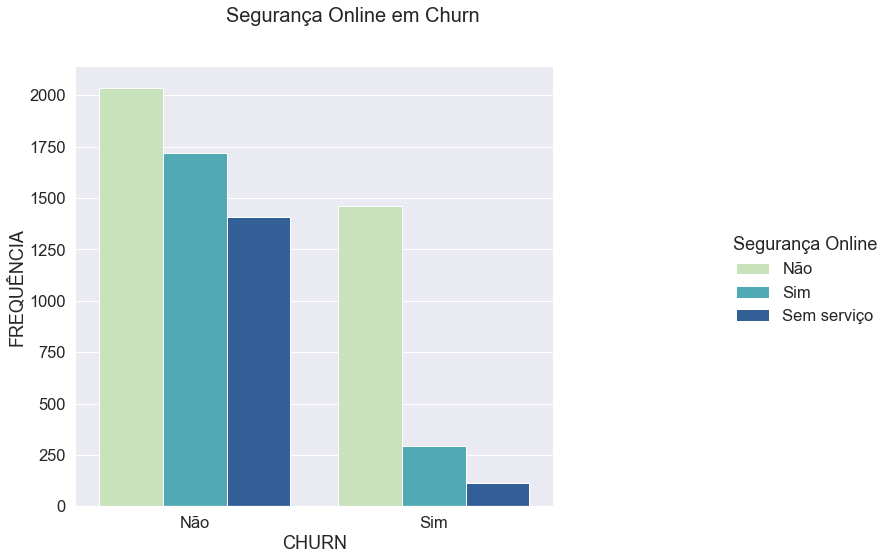

In [26]:
# Plotando variável Segurança Online em relação ao Churn
ax = sns.catplot(x="Churn", hue='Segurança Online', kind="count",  palette="YlGnBu", data=dados);
ax.fig.suptitle('Segurança Online em Churn', fontsize=20, y=1.05);
ax.set(xlabel='CHURN', ylabel='FREQUÊNCIA')
plt.gcf().set_size_inches(15, 8)

In [27]:
# Analisando Segurança Online
print()
print('Dos Clientes que permancem,  faz uso de segurança online: ')
print("'Não' representa {:.2f}%.".format(dados.query("Churn == 'Não'")['Segurança Online'].value_counts()[0]/dados.query("Churn == 'Não'")['Segurança Online'].count()*100))
print("'Sim' representa {:.2f}% .".format(dados.query("Churn == 'Não'")['Segurança Online'].value_counts()[1]/dados.query("Churn == 'Não'")['Segurança Online'].count()*100))
print("'Sem serviço' representa {:.2f}%.".format(dados.query("Churn == 'Não'")['Segurança Online'].value_counts()[2]/dados.query("Churn == 'Não'")['Segurança Online'].count()*100))
print()
print('Dos Clientes que cancelaram,  faz uso de segurança online: ')
print("'Não' representa {:.2f}%.".format(dados.query("Churn == 'Sim'")['Segurança Online'].value_counts()[0]/dados.query("Churn == 'Sim'")['Segurança Online'].count()*100))
print("'Sim' representa {:.2f}%.".format(dados.query("Churn == 'Sim'")['Segurança Online'].value_counts()[1]/dados.query("Churn == 'Sim'")['Segurança Online'].count()*100))
print("'Sem serviço' representa {:.2f}%.".format(dados.query("Churn == 'Sim'")['Segurança Online'].value_counts()[2]/dados.query("Churn == 'Sim'")['Segurança Online'].count()*100))
print()


Dos Clientes que permancem,  faz uso de segurança online: 
'Não' representa 39.43%.
'Sim' representa 33.31% .
'Sem serviço' representa 27.25%.

Dos Clientes que cancelaram,  faz uso de segurança online: 
'Não' representa 78.17%.
'Sim' representa 15.78%.
'Sem serviço' representa 6.05%.



---

* Diante do gráfico acima, é importante de nota a desigualdade de distribuição diante dos que permanecram e daqueles que cancelaram seus contratos. **78,17%** dos que cancelaram seus contratos disseram não fazer uso de serviço para segurança online. Ante **39,34%** dos clientes fidelizados.

---

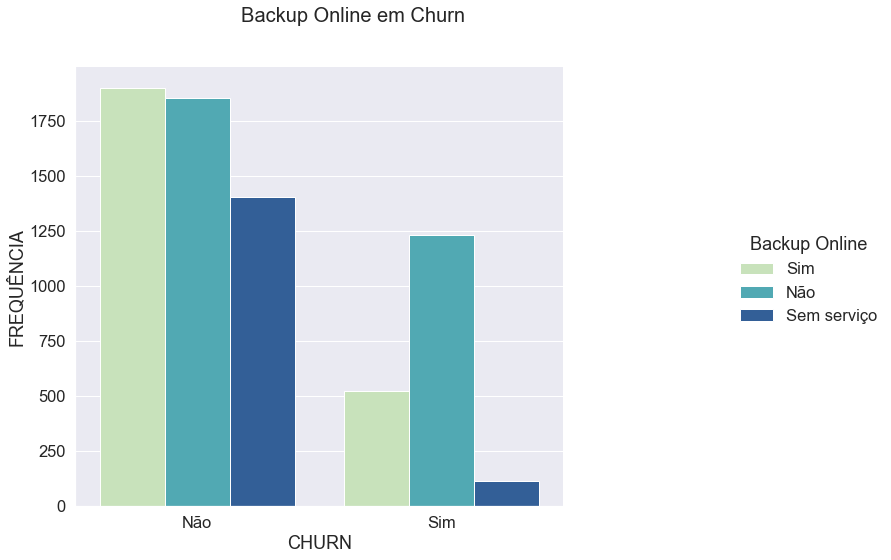

In [28]:
# Plotando variável Backup Online em relação ao Churn
ax = sns.catplot(x="Churn", hue='Backup Online', kind="count",  palette="YlGnBu", data=dados);
ax.fig.suptitle('Backup Online em Churn', fontsize=20, y=1.05);
ax.set(xlabel='CHURN', ylabel='FREQUÊNCIA')
plt.gcf().set_size_inches(15, 8)

In [29]:
# Analizando Backup Online
print()
print('Dos Clientes que permancem,  faz uso de Backup Online: ')
print("'Não' representa {:.2f}%.".format(dados.query("Churn == 'Não'")['Backup Online'].value_counts()[0]/dados.query("Churn == 'Não'")['Backup Online'].count()*100))
print("'Sim' representa {:.2f}% .".format(dados.query("Churn == 'Não'")['Backup Online'].value_counts()[1]/dados.query("Churn == 'Não'")['Backup Online'].count()*100))
print("'Sem serviço' representa {:.2f}%.".format(dados.query("Churn == 'Não'")['Backup Online'].value_counts()[2]/dados.query("Churn == 'Não'")['Backup Online'].count()*100))
print()
print('Dos Clientes que cancelaram,  faz uso de Backup Online: ')
print("'Sim' representa {:.2f}%.".format(dados.query("Churn == 'Sim'")['Backup Online'].value_counts()[0]/dados.query("Churn == 'Sim'")['Backup Online'].count()*100))
print("'Não' representa {:.2f}%.".format(dados.query("Churn == 'Sim'")['Backup Online'].value_counts()[1]/dados.query("Churn == 'Sim'")['Backup Online'].count()*100))
print("'Sem serviço' representa {:.2f}%.".format(dados.query("Churn == 'Sim'")['Backup Online'].value_counts()[2]/dados.query("Churn == 'Sim'")['Backup Online'].count()*100))
print()


Dos Clientes que permancem,  faz uso de Backup Online: 
'Não' representa 36.84%.
'Sim' representa 35.91% .
'Sem serviço' representa 27.25%.

Dos Clientes que cancelaram,  faz uso de Backup Online: 
'Sim' representa 65.97%.
'Não' representa 27.98%.
'Sem serviço' representa 6.05%.



---

* A distribuição dos indivíduos que deixaram a empresa: **65.97%** faziam uso de Backup Online. Ante **35,91%** dos fidelizados.

---

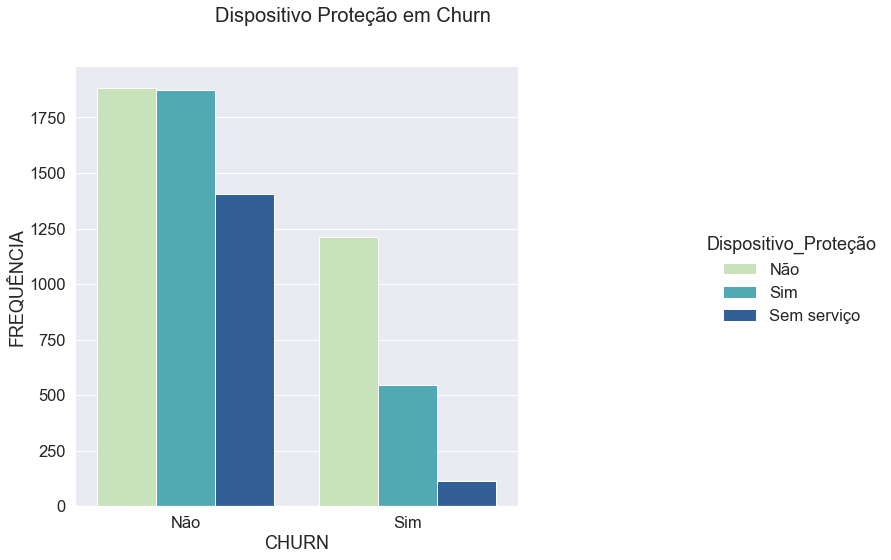

In [30]:
# Plotando variável Dispositivo Proteção em relação ao Churn
ax = sns.catplot(x="Churn", hue='Dispositivo_Proteção', kind="count",  palette="YlGnBu", data=dados);
ax.fig.suptitle('Dispositivo Proteção em Churn', fontsize=20, y=1.05);
ax.set(xlabel='CHURN', ylabel='FREQUÊNCIA')
plt.gcf().set_size_inches(15, 8)

In [31]:
# Analizando Dispositivo Proteção
print()
print('Dos Clientes que permancem,  faz uso de dispositivo de proteção: ')
print("'Não' representa {:.2f}%.".format(dados.query("Churn == 'Não'")['Dispositivo_Proteção'].value_counts()[0]/dados.query("Churn == 'Não'")['Dispositivo_Proteção'].count()*100))
print("'Sim' representa {:.2f}% .".format(dados.query("Churn == 'Não'")['Dispositivo_Proteção'].value_counts()[1]/dados.query("Churn == 'Não'")['Dispositivo_Proteção'].count()*100))
print("'Sem serviço' representa {:.2f}%.".format(dados.query("Churn == 'Não'")['Dispositivo_Proteção'].value_counts()[2]/dados.query("Churn == 'Não'")['Dispositivo_Proteção'].count()*100))
print()
print('Dos Clientes que cancelaram,  faz uso de dispositivo de proteção: ')
print("'Não' representa {:.2f}%.".format(dados.query("Churn == 'Sim'")['Dispositivo_Proteção'].value_counts()[0]/dados.query("Churn == 'Sim'")['Dispositivo_Proteção'].count()*100))
print("'Sim' representa {:.2f}%.".format(dados.query("Churn == 'Sim'")['Dispositivo_Proteção'].value_counts()[1]/dados.query("Churn == 'Sim'")['Dispositivo_Proteção'].count()*100))
print("'Sem serviço' representa {:.2f}%.".format(dados.query("Churn == 'Sim'")['Dispositivo_Proteção'].value_counts()[2]/dados.query("Churn == 'Sim'")['Dispositivo_Proteção'].count()*100))
print()


Dos Clientes que permancem,  faz uso de dispositivo de proteção: 
'Não' representa 36.47%.
'Sim' representa 36.28% .
'Sem serviço' representa 27.25%.

Dos Clientes que cancelaram,  faz uso de dispositivo de proteção: 
'Não' representa 64.79%.
'Sim' representa 29.16%.
'Sem serviço' representa 6.05%.



---

* Dentre os que cancelaram, **64,79%** não faziam uso de algum dispositivo para proteção dos dados. Perante os clientes que permanceram em seus contratos esse valor é **36.47%**.

---

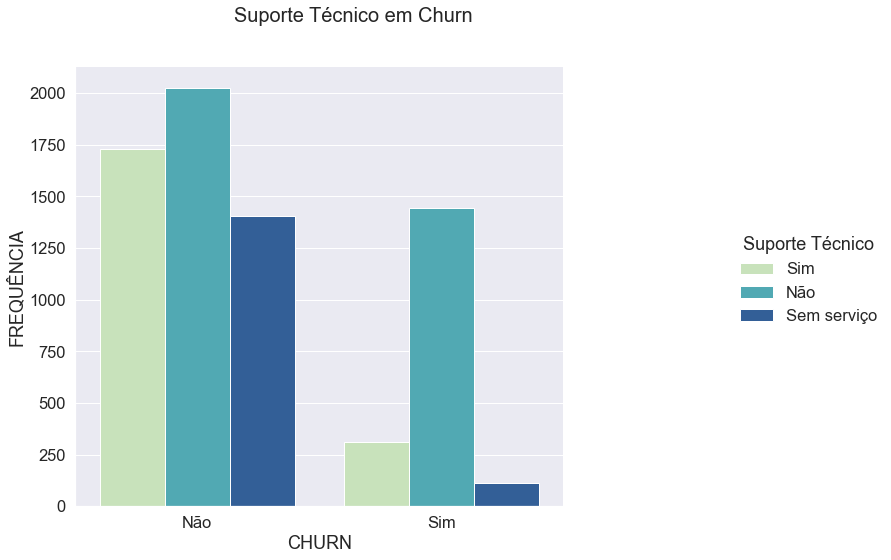

In [32]:
# Plotando Suporte Técnico em relação ao Churn
ax = sns.catplot(x="Churn", hue='Suporte Técnico', kind="count",  palette="YlGnBu", data=dados);
ax.fig.suptitle('Suporte Técnico em Churn', fontsize=20, y=1.05);
ax.set(xlabel='CHURN', ylabel='FREQUÊNCIA')
plt.gcf().set_size_inches(15, 8)

In [33]:
# Analisando Suporte Técnico
print()
print('Dos Clientes que permancem,  faz uso de Suporte Técnico: ')
print("'Não' representa {:.2f}%.".format(dados.query("Churn == 'Não'")['Suporte Técnico'].value_counts()[0]/dados.query("Churn == 'Não'")['Suporte Técnico'].count()*100))
print("'Sim' representa {:.2f}% .".format(dados.query("Churn == 'Não'")['Suporte Técnico'].value_counts()[1]/dados.query("Churn == 'Não'")['Suporte Técnico'].count()*100))
print("'Sem serviço' representa {:.2f}%.".format(dados.query("Churn == 'Não'")['Suporte Técnico'].value_counts()[2]/dados.query("Churn == 'Não'")['Suporte Técnico'].count()*100))
print()
print('Dos Clientes que cancelaram,  faz uso de Suporte Técnico: ')
print("'Não' representa {:.2f}%.".format(dados.query("Churn == 'Sim'")['Suporte Técnico'].value_counts()[0]/dados.query("Churn == 'Sim'")['Suporte Técnico'].count()*100))
print("'Sim' representa {:.2f}%.".format(dados.query("Churn == 'Sim'")['Suporte Técnico'].value_counts()[1]/dados.query("Churn == 'Sim'")['Suporte Técnico'].count()*100))
print("'Sem serviço' representa {:.2f}%.".format(dados.query("Churn == 'Sim'")['Suporte Técnico'].value_counts()[2]/dados.query("Churn == 'Sim'")['Suporte Técnico'].count()*100))
print()


Dos Clientes que permancem,  faz uso de Suporte Técnico: 
'Não' representa 39.24%.
'Sim' representa 33.51% .
'Sem serviço' representa 27.25%.

Dos Clientes que cancelaram,  faz uso de Suporte Técnico: 
'Não' representa 77.37%.
'Sim' representa 16.59%.
'Sem serviço' representa 6.05%.



___

* Dentre os que desistiram de seus contratos: **77.37%** dos indivíduos não faziam uso de suporte técnico, contra **39.24%** dos fidelizados.

___

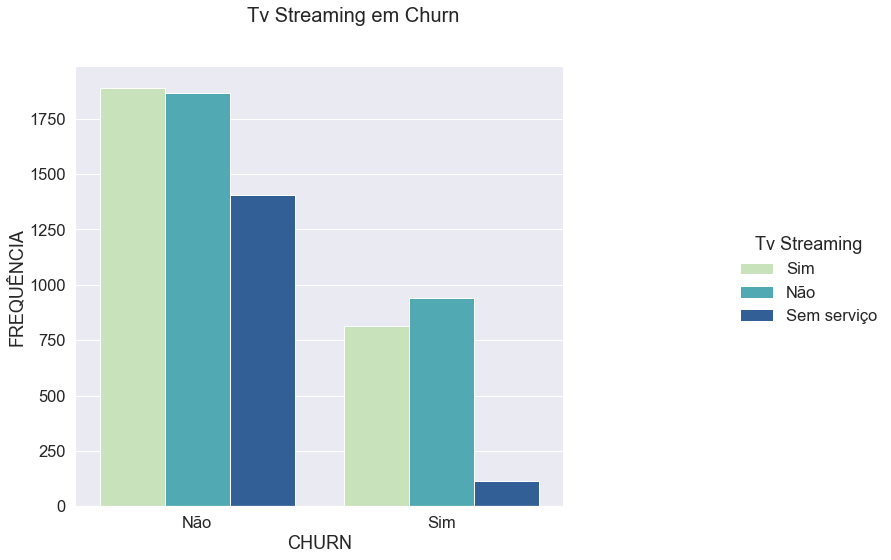

In [34]:
# Plotando Tv Streaming em relação ao Churn
ax = sns.catplot(x="Churn", hue='Tv Streaming', kind="count",  palette="YlGnBu", data=dados);
ax.fig.suptitle('Tv Streaming em Churn', fontsize=20, y=1.05);
ax.set(xlabel='CHURN', ylabel='FREQUÊNCIA')
plt.gcf().set_size_inches(15, 8)

In [35]:
# Analizando Tv Streaming
print()
print('Dos Clientes que permancem,  faz uso de Tv Streaming: ')
print("'Não' representa {:.2f}%.".format(dados.query("Churn == 'Não'")['Tv Streaming'].value_counts()[0]/dados.query("Churn == 'Não'")['Tv Streaming'].count()*100))
print("'Sim' representa {:.2f}% .".format(dados.query("Churn == 'Não'")['Tv Streaming'].value_counts()[1]/dados.query("Churn == 'Não'")['Tv Streaming'].count()*100))
print("'Sem serviço' representa {:.2f}%.".format(dados.query("Churn == 'Não'")['Tv Streaming'].value_counts()[2]/dados.query("Churn == 'Não'")['Tv Streaming'].count()*100))
print()
print('Dos Clientes que cancelaram,  faz uso de Tv Streaming: ')
print("'Não' representa {:.2f}%.".format(dados.query("Churn == 'Sim'")['Tv Streaming'].value_counts()[0]/dados.query("Churn == 'Sim'")['Tv Streaming'].count()*100))
print("'Sim' representa {:.2f}%.".format(dados.query("Churn == 'Sim'")['Tv Streaming'].value_counts()[1]/dados.query("Churn == 'Sim'")['Tv Streaming'].count()*100))
print("'Sem serviço' representa {:.2f}%.".format(dados.query("Churn == 'Sim'")['Tv Streaming'].value_counts()[2]/dados.query("Churn == 'Sim'")['Tv Streaming'].count()*100))
print()


Dos Clientes que permancem,  faz uso de Tv Streaming: 
'Não' representa 36.59%.
'Sim' representa 36.16% .
'Sem serviço' representa 27.25%.

Dos Clientes que cancelaram,  faz uso de Tv Streaming: 
'Não' representa 50.40%.
'Sim' representa 43.55%.
'Sem serviço' representa 6.05%.



---

* Os clientes desistentes: **50,40%** faziam uso de Tv Streaming. Por outro lado, **36,59%** dos fidelizados faziam uso do mesmo serviço.

----

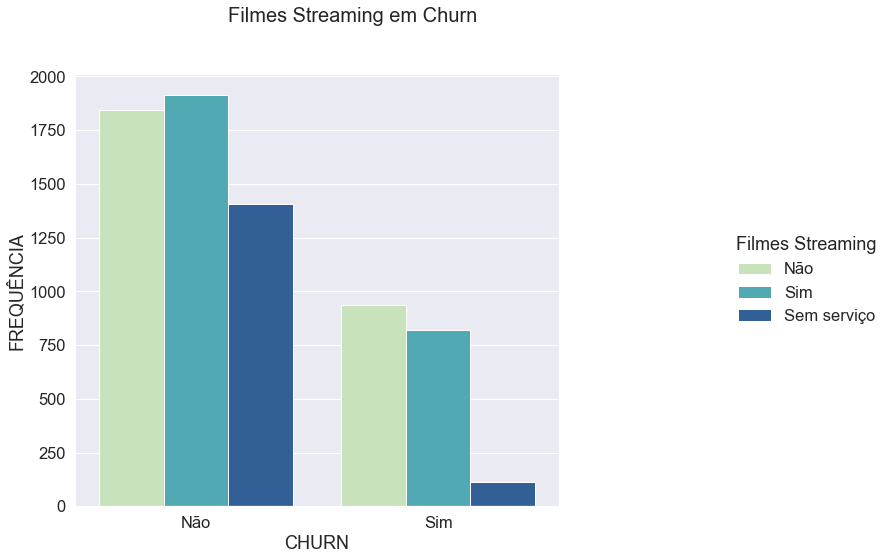

In [36]:
# Plotando Filmes Streaming em relação ao Churn
ax = sns.catplot(x="Churn", hue='Filmes Streaming', kind="count",  palette="YlGnBu", data=dados);
ax.fig.suptitle('Filmes Streaming em Churn', fontsize=20, y=1.05);
ax.set(xlabel='CHURN', ylabel='FREQUÊNCIA')
plt.gcf().set_size_inches(15, 8)

In [37]:
#Analizando dados filmes streaming
print()
print('Dos Clientes que permancem,  faz uso de Filmes Streaming: ')
print("'Sim' representa {:.2f}%.".format(dados.query("Churn == 'Não'")['Filmes Streaming'].value_counts()[0]/dados.query("Churn == 'Não'")['Filmes Streaming'].count()*100))
print("'Não' representa {:.2f}% .".format(dados.query("Churn == 'Não'")['Filmes Streaming'].value_counts()[1]/dados.query("Churn == 'Não'")['Filmes Streaming'].count()*100))
print("'Sem serviço' representa {:.2f}%.".format(dados.query("Churn == 'Não'")['Filmes Streaming'].value_counts()[2]/dados.query("Churn == 'Não'")['Filmes Streaming'].count()*100))
print()
print('Dos Clientes que cancelaram,  faz uso de Filmes Streaming: ')
print("'Não' representa {:.2f}%.".format(dados.query("Churn == 'Sim'")['Filmes Streaming'].value_counts()[0]/dados.query("Churn == 'Sim'")['Filmes Streaming'].count()*100))
print("'Sim' representa {:.2f}%.".format(dados.query("Churn == 'Sim'")['Filmes Streaming'].value_counts()[1]/dados.query("Churn == 'Sim'")['Filmes Streaming'].count()*100))
print("'Sem serviço' representa {:.2f}%.".format(dados.query("Churn == 'Sim'")['Filmes Streaming'].value_counts()[2]/dados.query("Churn == 'Sim'")['Filmes Streaming'].count()*100))
print()


Dos Clientes que permancem,  faz uso de Filmes Streaming: 
'Sim' representa 37.05%.
'Não' representa 35.70% .
'Sem serviço' representa 27.25%.

Dos Clientes que cancelaram,  faz uso de Filmes Streaming: 
'Não' representa 50.19%.
'Sim' representa 43.77%.
'Sem serviço' representa 6.05%.



---

* De acordo com o gráfico acima, **50,19%** dos que cancelaram seus contratos não faziam uso do serviço Filmes Streaming, ante **37,05%** dos fidelizados.

---

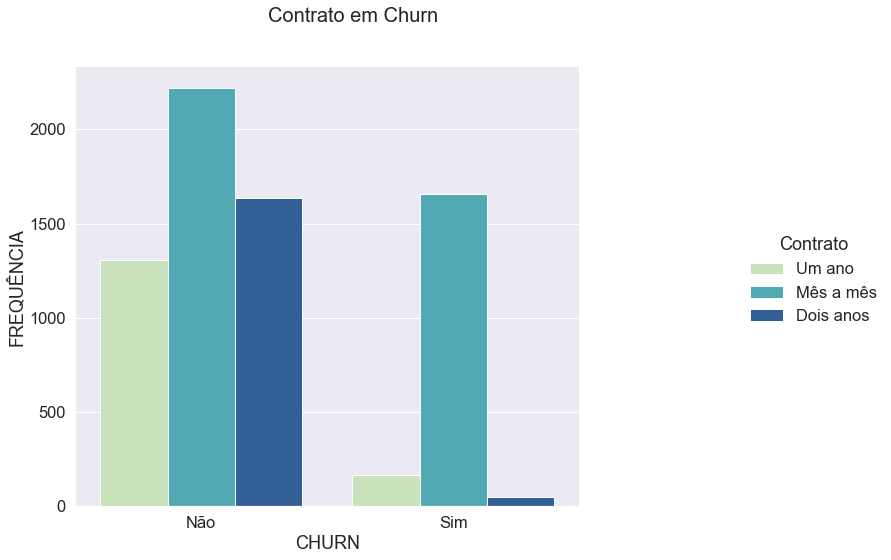

In [38]:
# Plotando variável Contrato em relação ao Churn
ax = sns.catplot(x="Churn", hue='Contrato', kind="count",  palette="YlGnBu", data=dados);
ax.fig.suptitle('Contrato em Churn', fontsize=20, y=1.05);
ax.set(xlabel='CHURN', ylabel='FREQUÊNCIA')
plt.gcf().set_size_inches(15, 8)

In [39]:
# Analizando filmes streaming
print()
print('Dos Clientes que permancem,  faz uso de Filmes Streaming: ')
print("'Um ano' representa {:.2f}%.".format(dados.query("Churn == 'Não'")['Contrato'].value_counts()[0]/dados.query("Churn == 'Não'")['Contrato'].count()*100))
print("'Mês a Mês' representa {:.2f}% .".format(dados.query("Churn == 'Não'")['Contrato'].value_counts()[1]/dados.query("Churn == 'Não'")['Contrato'].count()*100))
print("'Dois anos' representa {:.2f}%.".format(dados.query("Churn == 'Não'")['Contrato'].value_counts()[2]/dados.query("Churn == 'Não'")['Contrato'].count()*100))
print()
print('Dos Clientes que cancelaram,  faz uso de Filmes Streaming: ')
print("'Mês a Mês' representa {:.2f}%.".format(dados.query("Churn == 'Sim'")['Contrato'].value_counts()[0]/dados.query("Churn == 'Sim'")['Contrato'].count()*100))
print("'Um ano' representa {:.2f}%.".format(dados.query("Churn == 'Sim'")['Contrato'].value_counts()[1]/dados.query("Churn == 'Sim'")['Contrato'].count()*100))
print("'Dois anos' representa {:.2f}%.".format(dados.query("Churn == 'Sim'")['Contrato'].value_counts()[2]/dados.query("Churn == 'Sim'")['Contrato'].count()*100))
print()


Dos Clientes que permancem,  faz uso de Filmes Streaming: 
'Um ano' representa 43.00%.
'Mês a Mês' representa 31.71% .
'Dois anos' representa 25.30%.

Dos Clientes que cancelaram,  faz uso de Filmes Streaming: 
'Mês a Mês' representa 88.55%.
'Um ano' representa 8.88%.
'Dois anos' representa 2.57%.



---

* Pode-se ver de acordo com o gráfico que os dados dos **evadidos** encontram-se massivamente nos contratos **Mensais**, sendo eles **88,55%** da distribuição destes. E, daqueles que **permaneceram** nos contratos, o mais comum são os **Anuais**, representando **43%** dos dados.

---

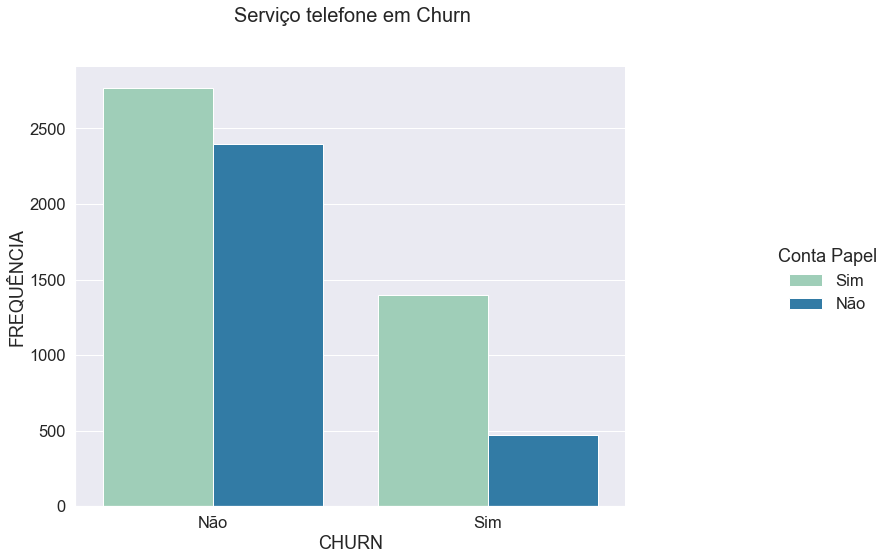

In [40]:
# Plotando variável serviço telefone em relação ao Churn
ax = sns.catplot(x="Churn", hue='Conta Papel', kind="count",  palette="YlGnBu", data=dados);
ax.fig.suptitle('Serviço telefone em Churn', fontsize=20, y=1.05);
ax.set(xlabel='CHURN', ylabel='FREQUÊNCIA')
plt.gcf().set_size_inches(15, 8)

In [41]:
# Analisando Conta Papel
print()
print('Dos Clientes que permancem,  faz uso de Conta Papel: ')
print("'Sim' representa {:.2f}%.".format(dados.query("Churn == 'Não'")['Conta Papel'].value_counts()[0]/dados.query("Churn == 'Não'")['Conta Papel'].count()*100))
print("'Não' representa {:.2f}% .".format(dados.query("Churn == 'Não'")['Conta Papel'].value_counts()[1]/dados.query("Churn == 'Não'")['Conta Papel'].count()*100))
print()
print('Dos Clientes que cancelaram,  faz uso de Conta Papel: ')
print("'Sim' representa {:.2f}%.".format(dados.query("Churn == 'Sim'")['Conta Papel'].value_counts()[0]/dados.query("Churn == 'Sim'")['Conta Papel'].count()*100))
print("'Não' representa {:.2f}%.".format(dados.query("Churn == 'Sim'")['Conta Papel'].value_counts()[1]/dados.query("Churn == 'Sim'")['Conta Papel'].count()*100))
print()


Dos Clientes que permancem,  faz uso de Conta Papel: 
'Sim' representa 53.61%.
'Não' representa 46.39% .

Dos Clientes que cancelaram,  faz uso de Conta Papel: 
'Sim' representa 74.91%.
'Não' representa 25.09%.



---

* Dos dados dos individuos que cancelaram, **74.91%** faziam uso da conta em papel impresso.

---

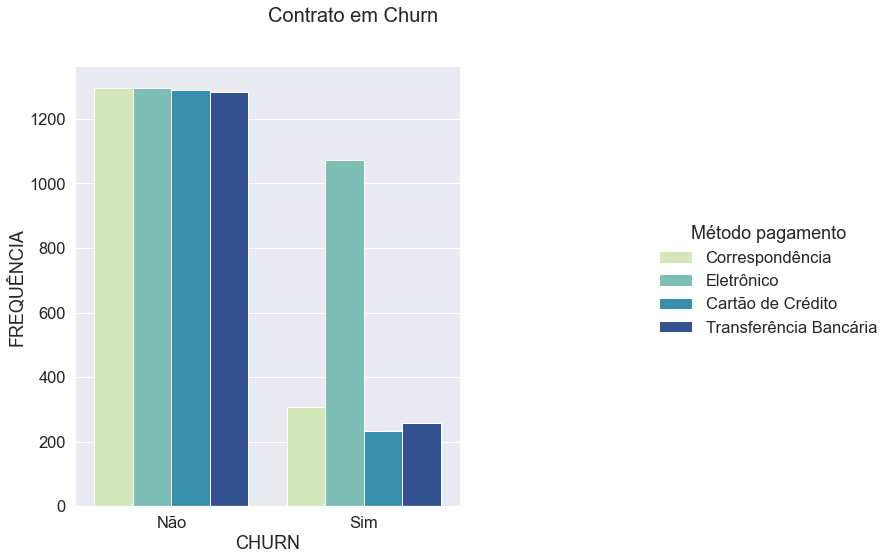

In [42]:
# Plotando variável Contrato em relação ao Churn
ax = sns.catplot(x="Churn", hue='Método pagamento', kind="count",  palette="YlGnBu", data=dados);
ax.fig.suptitle('Contrato em Churn', fontsize=20, y=1.05);
ax.set(xlabel='CHURN', ylabel='FREQUÊNCIA')
plt.gcf().set_size_inches(15, 8)

In [43]:
# Analisando método de pagamento
print()
print('Dos Clientes que permancem,  faz uso de Filmes Streaming: ')
print("'Correspondência' representa {:.2f}%.".format(dados.query("Churn == 'Não'")['Método pagamento'].value_counts()[0]/dados.query("Churn == 'Não'")['Método pagamento'].count()*100))
print("'Eletrônico' representa {:.2f}% .".format(dados.query("Churn == 'Não'")['Método pagamento'].value_counts()[1]/dados.query("Churn == 'Não'")['Método pagamento'].count()*100))
print("'Cartão de Crédito' representa {:.2f}%.".format(dados.query("Churn == 'Não'")['Método pagamento'].value_counts()[2]/dados.query("Churn == 'Não'")['Método pagamento'].count()*100))
print("'Transferência Bancária' representa {:.2f}%.".format(dados.query("Churn == 'Não'")['Método pagamento'].value_counts()[3]/dados.query("Churn == 'Não'")['Método pagamento'].count()*100))
print()
print('Dos Clientes que cancelaram,  faz uso de Filmes Streaming: ')
print("'Correspondência' representa {:.2f}%.".format(dados.query("Churn == 'Sim'")['Método pagamento'].value_counts()[0]/dados.query("Churn == 'Sim'")['Método pagamento'].count()*100))
print("'Eletrônico' representa {:.2f}%.".format(dados.query("Churn == 'Sim'")['Método pagamento'].value_counts()[1]/dados.query("Churn == 'Sim'")['Método pagamento'].count()*100))
print("'Cartão de Crédito' representa {:.2f}%.".format(dados.query("Churn == 'Sim'")['Método pagamento'].value_counts()[2]/dados.query("Churn == 'Sim'")['Método pagamento'].count()*100))
print("'Transferência Bancária' representa {:.2f}%.".format(dados.query("Churn == 'Sim'")['Método pagamento'].value_counts()[3]/dados.query("Churn == 'Sim'")['Método pagamento'].count()*100))
print()


Dos Clientes que permancem,  faz uso de Filmes Streaming: 
'Correspondência' representa 25.10%.
'Eletrônico' representa 25.06% .
'Cartão de Crédito' representa 24.97%.
'Transferência Bancária' representa 24.87%.

Dos Clientes que cancelaram,  faz uso de Filmes Streaming: 
'Correspondência' representa 57.30%.
'Eletrônico' representa 16.48%.
'Cartão de Crédito' representa 13.80%.
'Transferência Bancária' representa 12.41%.



---

* **57.3%** dos modos de pagamento eram por correspôndencia para aqueles que cancelaram seus contratos. Os fidelizados apresentaram pouco diferença entre cada um dos métodos.


---

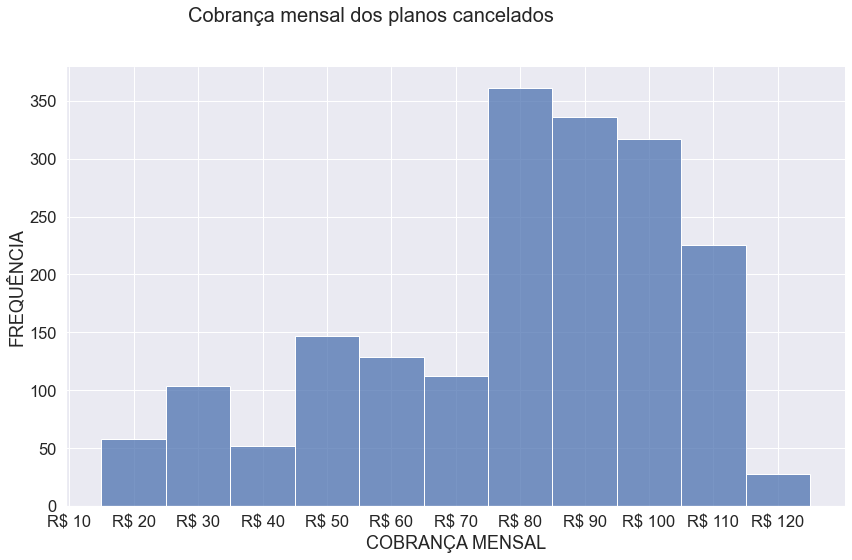

In [44]:
# Plotando Cobrança Mensal
label1 = []
for i in range(10,130,10):
    label1.append('R$ {}'.format(i))
ax = sns.displot(pd.cut(dados.query("Churn == 'Sim'")['Cobrança Mensal'], bins=np.arange(0, 130, 10), labels=label1))
ax.fig.suptitle('Cobrança mensal dos planos cancelados', fontsize=20, y=1.05);
ax.set(xlabel='COBRANÇA MENSAL', ylabel='FREQUÊNCIA')
plt.gcf().set_size_inches(15, 8)

In [45]:
# Análise estatística
dados.query("Churn == 'Sim'")['Cobrança Mensal'].describe()

count   1869.00
mean      74.44
std       24.67
min       18.85
25%       56.15
50%       79.65
75%       94.20
max      118.35
Name: Cobrança Mensal, dtype: float64

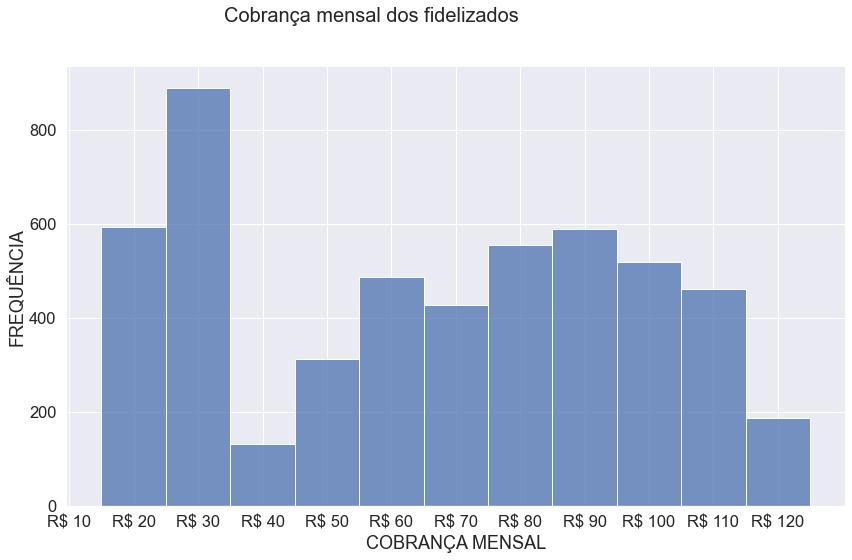

In [46]:
# Plotando Cobrança Mensal
ax = sns.displot(pd.cut(dados.query("Churn == 'Não'")['Cobrança Mensal'], bins=np.arange(0, 130, 10), labels=label1))
ax.fig.suptitle('Cobrança mensal dos fidelizados', fontsize=20, y=1.05);
ax.set(xlabel='COBRANÇA MENSAL', ylabel='FREQUÊNCIA')
plt.gcf().set_size_inches(15, 8)

In [47]:
# Análise estatística
dados.query("Churn == 'Não'")['Cobrança Mensal'].describe()

count   5163.00
mean      61.31
std       31.09
min       18.25
25%       25.10
50%       64.45
75%       88.47
max      118.75
Name: Cobrança Mensal, dtype: float64

---

* A **média** e **mediana** dos valores daqueles que **cancelaram** o contrato é **R\\$ 74** e **R\\$ 79**, respectivamente. Enquanto para aqueles que **permanceram** é de **R\\$ 61** e **R\\$ 64**, **respectivamente**. 

---

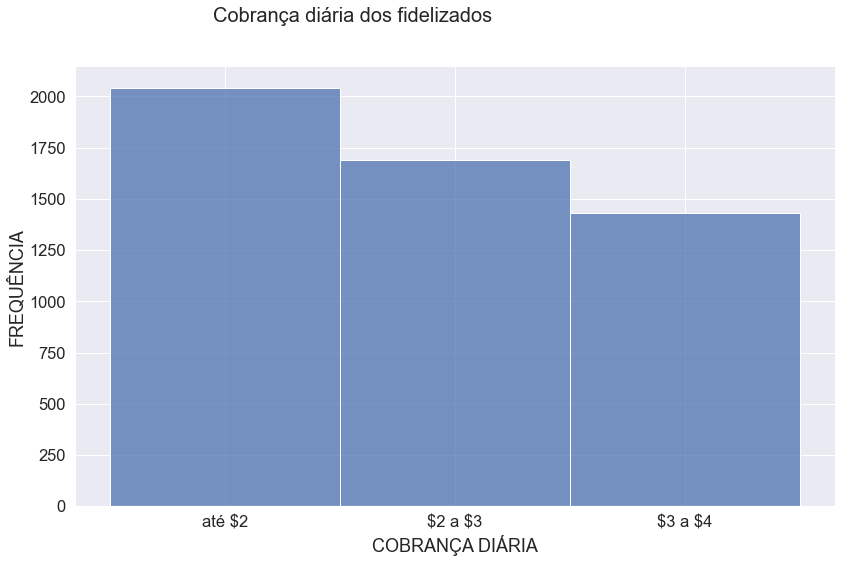

In [48]:
# Plotando Cobrança diária
label2 = ['até \$2', '\$2 a \$3', '\$3 a \$4']
ax = sns.displot(pd.cut(dados.query("Churn == 'Não'")['Cobrança diária'], bins= 3, labels=label2))
ax.fig.suptitle('Cobrança diária dos fidelizados', fontsize=20, y=1.05);
ax.set(xlabel='COBRANÇA DIÁRIA', ylabel='FREQUÊNCIA')
plt.gcf().set_size_inches(15, 8)

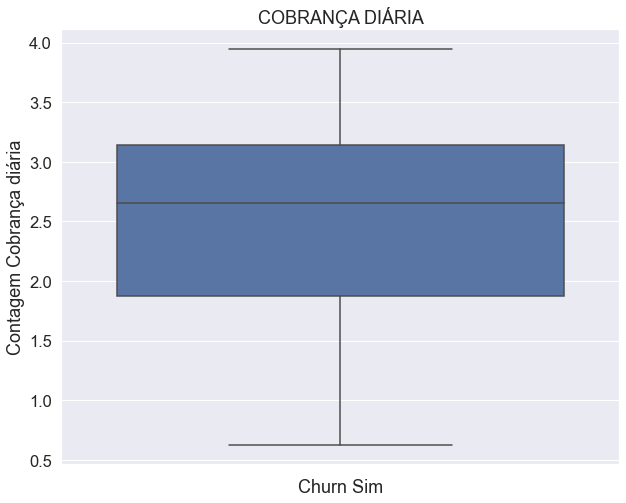

In [49]:
sns.set(font_scale = 1.5)
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data = dados.query("Churn == 'Sim'"), y="Cobrança diária")
ax.set(title='COBRANÇA DIÁRIA')
ax.set(xlabel='Churn Sim', ylabel='Contagem Cobrança diária');

In [50]:
# Análise estatística
dados.query("Churn == 'Sim'")['Cobrança diária'].describe()

count   1869.00
mean       2.48
std        0.82
min        0.63
25%        1.87
50%        2.65
75%        3.14
max        3.94
Name: Cobrança diária, dtype: float64

---

* De acordo com a análise estatística e gráfica, pode-se concluir que a distribuição dos valores nos dados daqueles que cancelaram seus contratos eram ligeiramente mais altos que os fidelizados.

---

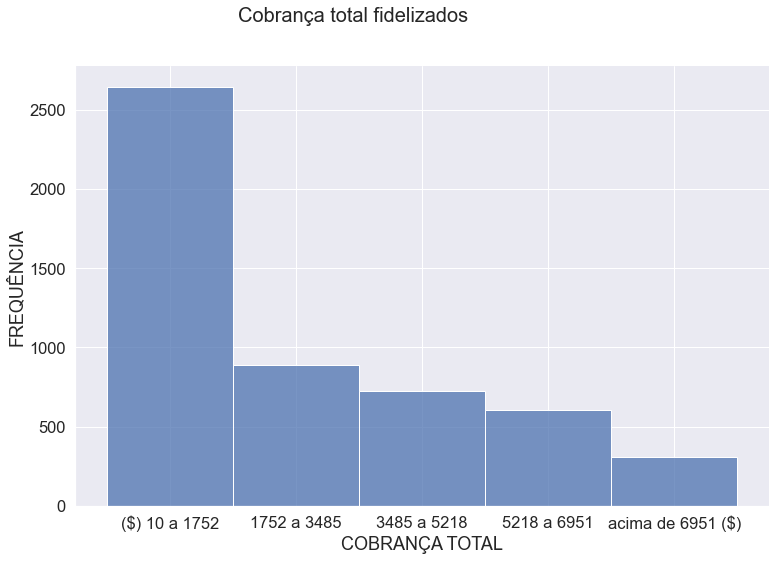

In [51]:
# Plotando Cobrança Total
label3= []
for i in pd.cut(pd.to_numeric(dados['Cobrança Total'], downcast="integer"), bins=5).unique().sort_values():
    label3.append('{}'.format(i))
ax = sns.displot(pd.cut(pd.to_numeric(dados.query("Churn == 'Não'")['Cobrança Total'], downcast="integer"), bins=5, labels=label3));
ax.fig.suptitle('Cobrança total fidelizados', fontsize=20, y=1.05);
ax.set(xlabel='COBRANÇA TOTAL', ylabel='FREQUÊNCIA', xticklabels=['(\$) 10 a 1752','1752 a 3485','3485 a 5218','5218 a 6951','acima de 6951 (\$)'])
plt.gcf().set_size_inches(15, 8)

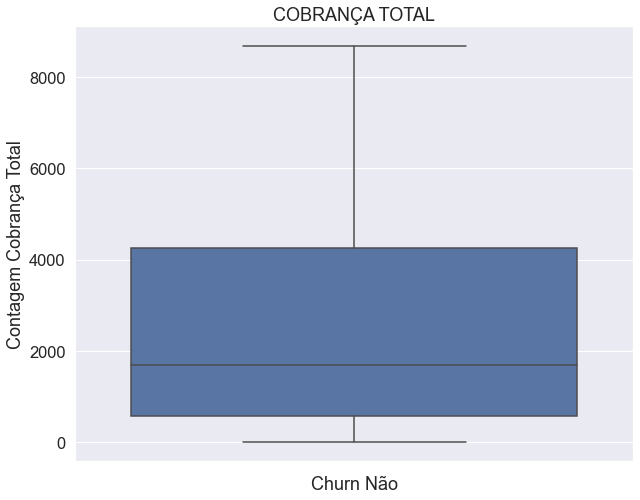

In [52]:
sns.set(font_scale = 1.5)
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data = dados.query("Churn == 'Não'"), y="Cobrança Total")
ax.set(title='COBRANÇA TOTAL')
ax.set(xlabel='Churn Não', ylabel='Contagem Cobrança Total');

In [53]:
# Análise estatística
dados.query("Churn == 'Não'")['Cobrança Total'].describe()

count   5163.00
mean    2555.34
std     2329.46
min       18.80
25%      577.83
50%     1683.60
75%     4264.12
max     8672.45
Name: Cobrança Total, dtype: float64

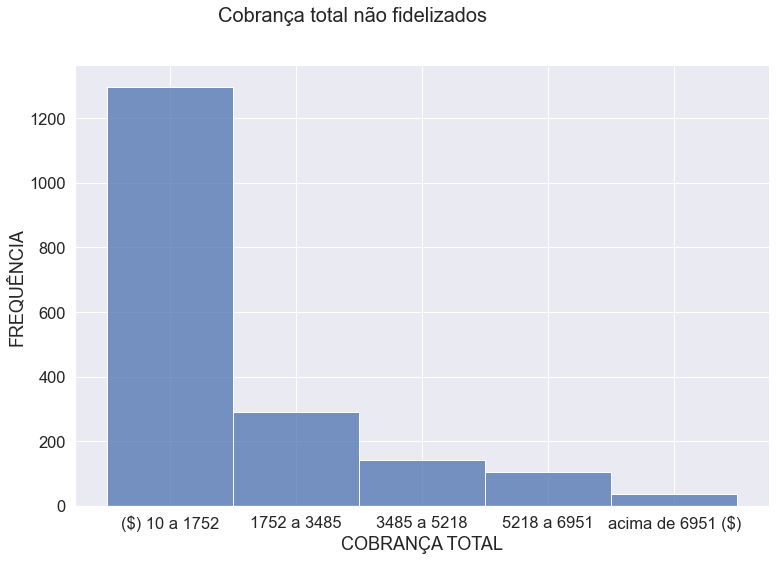

In [54]:
# Plotando Cobrança Total
ax = sns.displot(pd.cut(pd.to_numeric(dados.query("Churn == 'Sim'")['Cobrança Total'], downcast="integer"), bins=5, labels=label3));
ax.fig.suptitle('Cobrança total não fidelizados', fontsize=20, y=1.05);
ax.set(xlabel='COBRANÇA TOTAL', ylabel='FREQUÊNCIA', xticklabels=['(\$) 10 a 1752','1752 a 3485','3485 a 5218','5218 a 6951','acima de 6951 (\$)'])
plt.gcf().set_size_inches(15, 8)

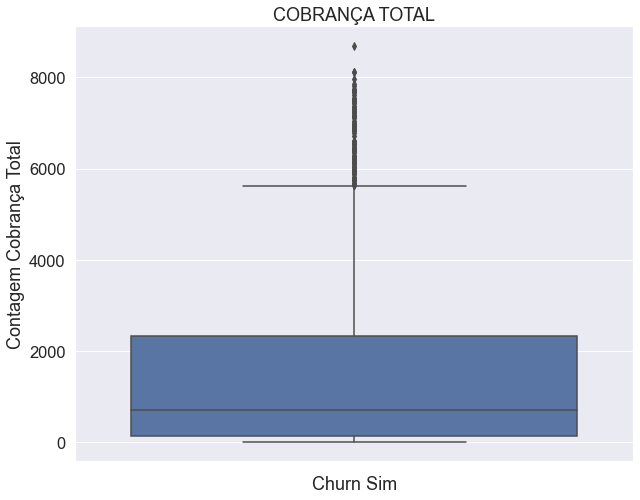

In [55]:
sns.set(font_scale = 1.5)
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data = dados.query("Churn == 'Sim'"), y="Cobrança Total")
ax.set(title='COBRANÇA TOTAL')
ax.set(xlabel='Churn Sim', ylabel='Contagem Cobrança Total');

In [56]:
# Análise estatística
dados.query("Churn == 'Sim'")['Cobrança Total'].describe()

count   1869.00
mean    1531.80
std     1890.82
min       18.85
25%      134.50
50%      703.55
75%     2331.30
max     8684.80
Name: Cobrança Total, dtype: float64

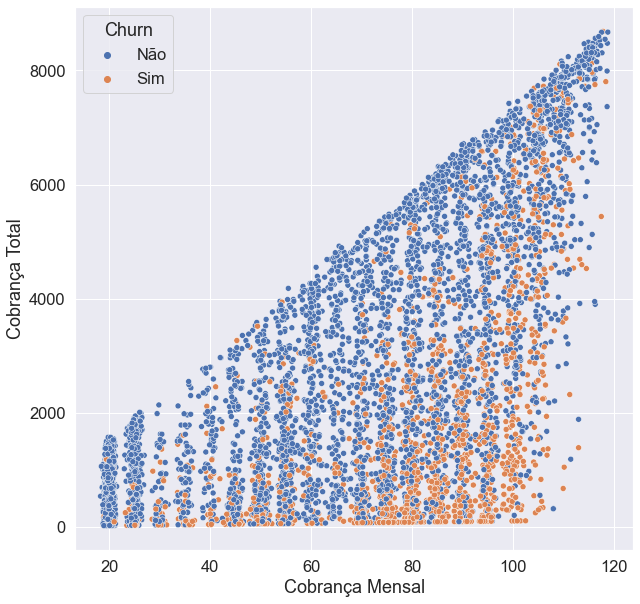

In [57]:
sns.set(font_scale = 1.5)
plt.figure(figsize=(10, 10))
sns.scatterplot(data = dados, x="Cobrança Mensal", y="Cobrança Total", hue='Churn')
ax.set(title='Relação Cobrança Mensal e Total')
ax.set_title("Plot")
ax.set(xlabel='Cobrança Mensal', ylabel='Cobrança Total');

---

* De acordo com a análise estatística, pode-se verificar que a média e mediana na cobrança total é mais alta nos fidelizados, visto que estes, como já se pode verificar em análises anteriores, ficam durante mais tempo em seus contratos.

---

In [65]:
noChurn = dados.query("Churn == 'Não'")
yChurn= dados.query("Churn == 'Sim'")

In [74]:
### Teste de significância estatítica
def distribution(data1, data2):
    
    for i in data1.columns:
        a = le.fit_transform(data1[i])        
        b = le.fit_transform(data2[i])
        
        stat, p = stats.ttest_ind(a, b)
        if p < 0.05:
            print('{}: distribuições diferentes.\n'.format(i))
        else:
            print('->->-> {}: distribuições iguais.\n'.format(i))
            
distribution(yChurn,noChurn)

->->-> Churn: distribuições iguais.

->->-> gênero: distribuições iguais.

idoso: distribuições diferentes.

Parceiro: distribuições diferentes.

Dependentes: distribuições diferentes.

Meses contrato: distribuições diferentes.

->->-> Serviço telefone: distribuições iguais.

Linhas multiplas: distribuições diferentes.

Serviço Internet: distribuições diferentes.

Segurança Online: distribuições diferentes.

Backup Online: distribuições diferentes.

Dispositivo_Proteção: distribuições diferentes.

Suporte Técnico: distribuições diferentes.

Tv Streaming: distribuições diferentes.

Filmes Streaming: distribuições diferentes.

Contrato: distribuições diferentes.

Conta Papel: distribuições diferentes.

Método pagamento: distribuições diferentes.

Cobrança Mensal: distribuições diferentes.

Cobrança Total: distribuições diferentes.

Cobrança diária: distribuições diferentes.



---

* De acordo com o teste paramétrico T student, somente `churn, gênero` e `serviço telefone` são variáveis que possuem distribuições que se assemelham.

---

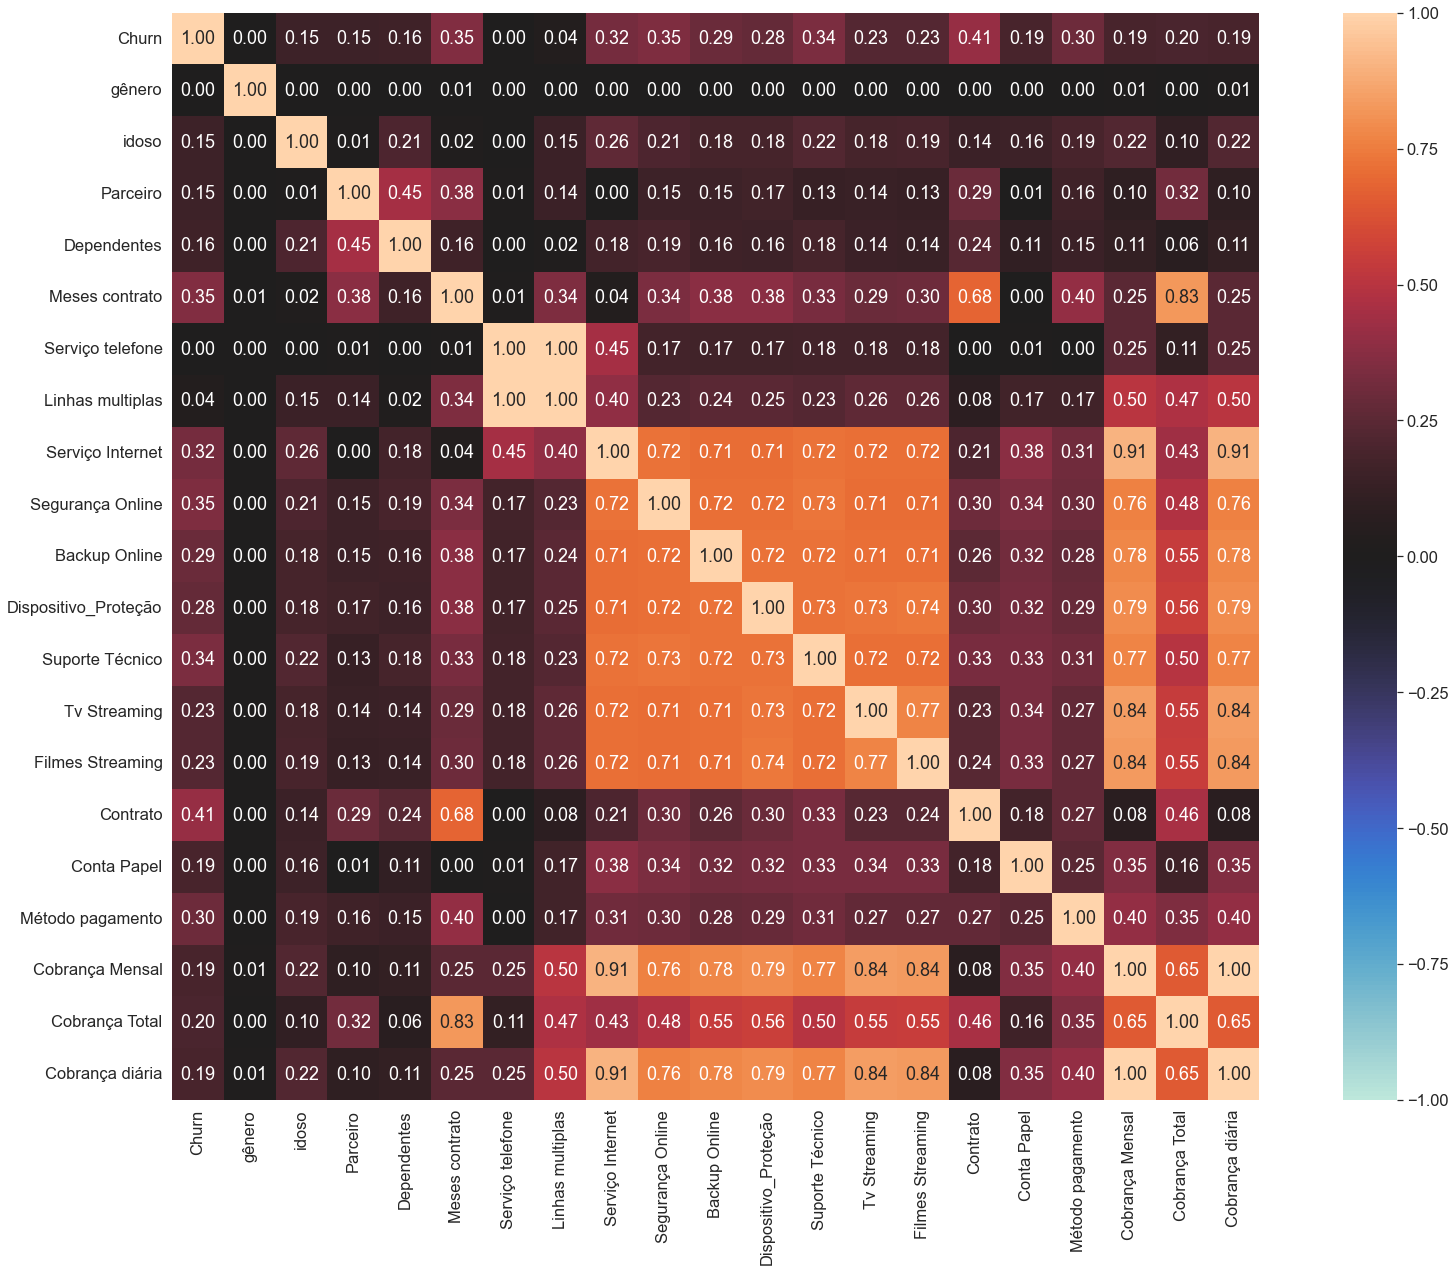

{'corr':                       Churn  gênero  idoso  Parceiro  Dependentes  \
 Churn                  1.00    0.00   0.15      0.15         0.16   
 gênero                 0.00    1.00   0.00      0.00         0.00   
 idoso                  0.15    0.00   1.00      0.01         0.21   
 Parceiro               0.15    0.00   0.01      1.00         0.45   
 Dependentes            0.16    0.00   0.21      0.45         1.00   
 Meses contrato         0.35    0.01   0.02      0.38         0.16   
 Serviço telefone       0.00    0.00   0.00      0.01         0.00   
 Linhas multiplas       0.04    0.00   0.15      0.14         0.02   
 Serviço Internet       0.32    0.00   0.26      0.00         0.18   
 Segurança Online       0.35    0.00   0.21      0.15         0.19   
 Backup Online          0.29    0.00   0.18      0.15         0.16   
 Dispositivo_Proteção   0.28    0.00   0.18      0.17         0.16   
 Suporte Técnico        0.34    0.00   0.22      0.13         0.18   
 Tv Streamin

In [78]:
# Mapa de calor que ilustra a correlação entre as variáveis e a variável Target.
nominal.associations(dados, figsize=(30,20))

---

* O gráfico acima demonstra que não há nenhuma variável que se correlaciona fortemente com a variável `Churn`.

---

In [79]:
# Exportando dados CSV
dados.to_csv('Viz_alura_voz.csv', index=False)